## Завдання:    
До пункту видачі надійшли вироби з такими характеристиками:
Всього виробів – 13000 одиниць, з них виготовлено на першому заводі — 8000 од., вагою 13 кг., зі стандартним відхиленням по вазі 0.5 кг.. На другому — 5000 од., вагою 12 кг., зі стандартним відхиленням по вазі 0.7 кг. Доля якісних виробів, вироблених на першому заводі, становить 0.85. Доля якісних виробів, вироблених на другому заводі 0,8.


Написати код, з використанням EM-алгоритму, для визначення ймовірності, на якому заводі був вироблений виріб.


In [112]:
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from numpy import random 
from pandas import DataFrame

#### Генерація даних згідно умови задачи.

In [122]:
x1 = np.random.normal(loc=13, scale=0.5, size=8000)
x2 = np.random.normal(loc=12, scale=0.7, size=5000)
x = np.concatenate((x1, x2))
np.random.shuffle(x)

#### Візуалізація одновимірних даних.

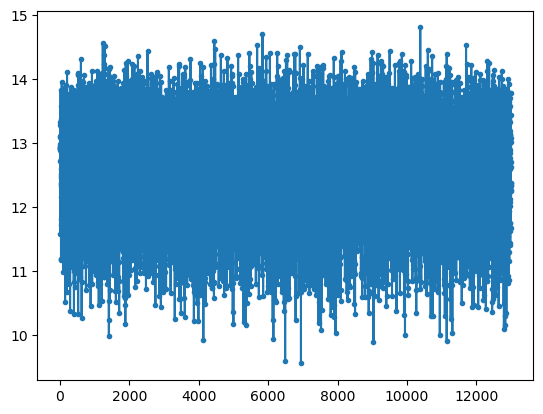

In [116]:
plt.plot(x, marker='.')

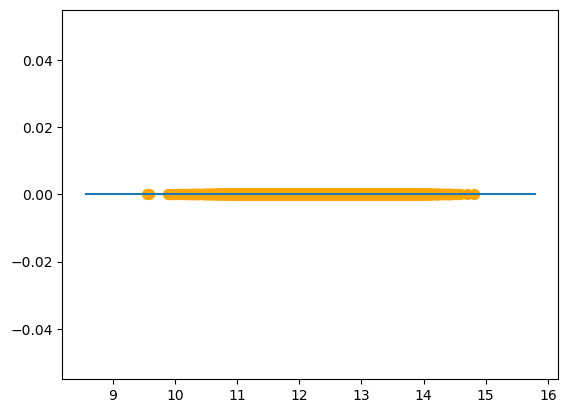

In [117]:
plt.hlines(0, xmin=min(x)-1, xmax=max(x)+1)
plt.scatter(x, [0] * len(x), c="orange", s=50)

#### Застосування ЕМ-алгоритму кластеризації.

In [118]:
x = x.reshape(-1, 1)
gmm = GaussianMixture(n_components=2).fit(x)

In [119]:
centers = gmm.means_.reshape(-1, 1)
print(centers)

[[13.01074484]
 [11.91831465]]


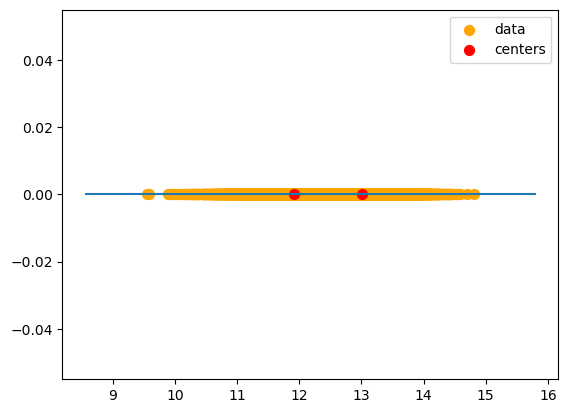

In [120]:
plt.hlines(0, xmin=min(x)-1, xmax=max(x)+1)
plt.scatter(x, [0] * len(x), c="orange", s=50, label="data")
plt.scatter(centers, [0] * len(centers), c='red', s = 50, label="centers")
plt.legend()
plt.show() 

#### Результати кластеризації.

In [121]:
pr = gmm.predict(x)
print(f'Кількість значень у 1-му кластері: {sum(pr == 0)}')
print(f'Ймовірність, що деталь виготовлена на 1-му заводі: {sum(pr == 0)/len(pr):.4f}')
print(f'Кількість значень у 2-му кластері: {sum(pr == 1)}')
print(f'Ймовірність, що деталь виготовлена на 2-му заводі: {sum(pr == 1)/len(pr):.4f}')

Кількість значень у 1-му кластері: 9005
Ймовірність, що деталь виготовлена на 1-му заводі: 0.6927
Кількість значень у 2-му кластері: 3995
Ймовірність, що деталь виготовлена на 2-му заводі: 0.3073


### Висновок:
Алгоритм достатньо точно визначив центри кластерів: 11.9 і 13.0. Але при визначенні належності елементів певному кластеру допускає деяку похибку.  
В реальності ймовірність, що деталь вироблено на 1-му заводі дорівнює 8/13 = 0.62, а на другому 5/13 = 0.38.  
Ця похибка пов'язана з тим, що значення плотно перетинаються між 12 і 13. Тому алгоритм не дуже точно визначив кількість елементів по кластерах.